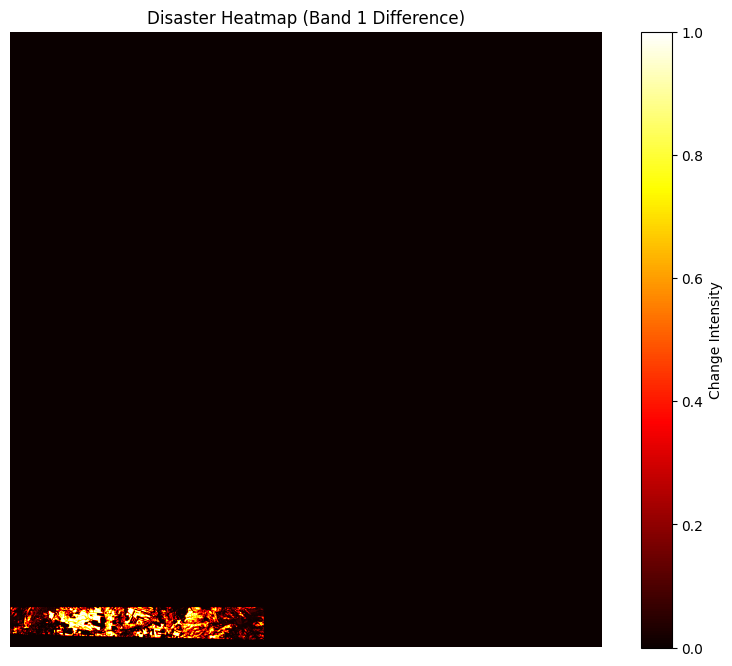

✅ Heatmap saved to: C:\Users\sagni\Downloads\Disaster Prediction\disaster_heatmap.png


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to the HDF5 file
h5_path = r"C:\Users\sagni\Downloads\Disaster Prediction\disaster_data.h5"

# Open the HDF5 file and read both datasets
with h5py.File(h5_path, 'r') as f:
    before = f['before_disaster'][:]  # shape: (bands, height, width)
    after = f['after_disaster'][:]

# Use only the first band or calculate difference
# Optional: you can select a particular band like NDVI if available (e.g., band 8 - band 4)
# Here we compute absolute difference of band 1
band_index = 0
diff = np.abs(after[band_index] - before[band_index])

# Normalize the difference to [0,1] for better heatmap visualization
diff_norm = (diff - diff.min()) / (diff.max() - diff.min())

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(diff_norm, cmap='hot')
plt.title("Disaster Heatmap (Band {} Difference)".format(band_index + 1))
plt.colorbar(label='Change Intensity')
plt.axis('off')

# Save the heatmap
output_path = r"C:\Users\sagni\Downloads\Disaster Prediction\disaster_heatmap.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

print(f"✅ Heatmap saved to: {output_path}")


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the HDF5 file
h5_path = r"C:\Users\sagni\Downloads\Disaster Prediction\disaster_data.h5"
output_dir = r"C:\Users\sagni\Downloads\Disaster Prediction\Band_Heatmaps"
os.makedirs(output_dir, exist_ok=True)

# Read both datasets
with h5py.File(h5_path, 'r') as f:
    before = f['before_disaster'][:]  # shape: (bands, height, width)
    after = f['after_disaster'][:]

# Generate heatmap for each band
num_bands = before.shape[0]

for i in range(num_bands):
    diff = np.abs(after[i] - before[i])

    # Normalize the difference for visualization
    diff_norm = (diff - diff.min()) / (diff.max() - diff.min())

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(diff_norm, cmap='hot')
    plt.title(f"Disaster Heatmap - Band {i + 1}")
    plt.axis('off')
    plt.colorbar(label='Change Intensity')

    # Save each heatmap
    heatmap_path = os.path.join(output_dir, f"heatmap_band_{i + 1}.png")
    plt.savefig(heatmap_path, bbox_inches='tight')
    plt.close()

    print(f"✅ Saved: {heatmap_path}")

print("\n📍 All band heatmaps saved successfully.")


✅ Saved: C:\Users\sagni\Downloads\Disaster Prediction\Band_Heatmaps\heatmap_band_1.png
✅ Saved: C:\Users\sagni\Downloads\Disaster Prediction\Band_Heatmaps\heatmap_band_2.png
✅ Saved: C:\Users\sagni\Downloads\Disaster Prediction\Band_Heatmaps\heatmap_band_3.png

📍 All band heatmaps saved successfully.
